# Combination of All Iteration

## Importing IMDB Dataset

In [1]:
import keras


In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]


In [ ]:
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
decoded_review


## Preparing the Data

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

In [10]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the Network

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating the Apporach

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5828 - binary_accuracy: 0.6987 - val_loss: 0.3663 - val_binary_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3066 - binary_accuracy: 0.9053 - val_loss: 0.2935 - val_binary_accuracy: 0.8906
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2180 - binary_accuracy: 0.9296 - val_loss: 0.3000 - val_binary_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1665 - binary_accuracy: 0.9466 - val_loss: 0.2895 - val_binary_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1345 - binary_accuracy: 0.9591 - val_loss: 0.2834 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1077 - binary_accuracy: 0.9683 - val_loss: 0.3128 - val_binary_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

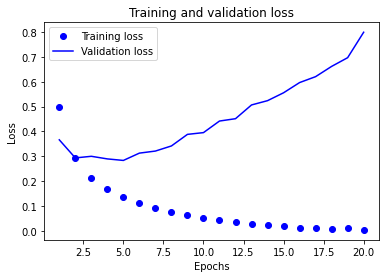

In [18]:
import matplotlib.pyplot as plt

binary_accuracy = history.history['binary_accuracy']
val_binary_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(binary_accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


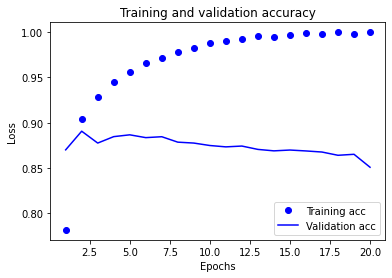

In [19]:
plt.clf()   # clear figure
binary_accuracy_values = history_dict['binary_accuracy']
val_binary_accuracy_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_binary_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_val, y_val, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
20/20 [==============================] - 1s 26ms/step - loss: 0.2094 - accuracy: 0.6533
Epoch 2/4
20/20 [==============================] - 1s 27ms/step - loss: 0.1097 - accuracy: 0.8944
Epoch 3/4
20/20 [==============================] - 1s 26ms/step - loss: 0.0804 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.8822


In [21]:

results

[0.09303263574838638, 0.8822399973869324]

## Predictions on New Data

In [22]:
model.predict(x_test)

array([[0.38397413],
       [0.99466455],
       [0.79271615],
       ...,
       [0.23864087],
       [0.17687595],
       [0.36308438]], dtype=float32)